<center><h1>Tensorflow Flower Recognition Model</h1><center>


# Workflow :
> Load Data <brr>
> Encode labels.<br>
> Create Model<br>
> Compilation Step
> Train the Model.<br>
> If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
> Prediction should be > 85%<br>
> Evaluation Step<br>
> Prediction

### My original notebook kaggle link: https://www.kaggle.com/alirazaaliqadri/flower-recognition-tensorflow-keras-sequential

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import os.path
import seaborn as sns
import matplotlib.pyplot as plt 
import cv2
plt.style.use('seaborn')

### Below dataset can be found on kaggle 
Kaggle Dataset link : https://www.kaggle.com/alxmamaev/flowers-recognition

In [2]:
Flowers_All_Path = Path("../input/flowers-recognition/flowers/flowers")



In [3]:
Flowers_Path = list(Flowers_All_Path.glob(r"*/*.jpg"))

In [4]:
Flowers_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Flowers_Path))


In [5]:
image_path = pd.Series(Flowers_Path,name="ImagePath").astype(str)

In [6]:
image_lables = pd.Series(Flowers_Labels,name="Type")

In [7]:
display(image_path.head())

0     flowers\flowers\daisy\100080576_f52e8ee070_n.jpg
1     flowers\flowers\daisy\10140303196_b88d3d6cec.jpg
2    flowers\flowers\daisy\10172379554_b296050f82_n...
3     flowers\flowers\daisy\10172567486_2748826a8b.jpg
4    flowers\flowers\daisy\10172636503_21bededa75_n...
Name: ImagePath, dtype: object

In [8]:
df = pd.concat([image_path,image_lables],axis=1)

In [9]:
df.head()

,ImagePath,Type
0,flowers\flowers\daisy\100080576_f52e8ee070_n.jpg,daisy
1,flowers\flowers\daisy\10140303196_b88d3d6cec.jpg,daisy
2,flowers\flowers\daisy\10172379554_b296050f82_n...,daisy
3,flowers\flowers\daisy\10172567486_2748826a8b.jpg,daisy
4,flowers\flowers\daisy\10172636503_21bededa75_n...,daisy


In [10]:
df.shape

(4323, 2)

In [11]:
df = df.sample(frac=1).reset_index(drop=True)

In [12]:
df.head()

,ImagePath,Type
0,flowers\flowers\tulip\14097111174_87a2e7e0c7_n...,tulip
1,flowers\flowers\tulip\471298577_cc7558bcf1.jpg,tulip
2,flowers\flowers\tulip\14746916178_40403cc57e.jpg,tulip
3,flowers\flowers\daisy\2838487505_6c3b48efa5_m.jpg,daisy
4,flowers\flowers\tulip\7166560822_27b1d1d132_n.jpg,tulip


In [13]:
df.shape

(4323, 2)

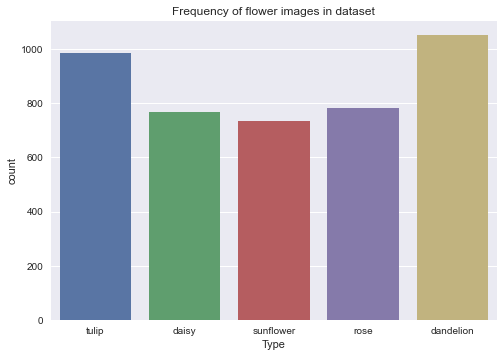

In [14]:
plt.style.use('seaborn')
sns.countplot(x='Type', data=df
plt.title("Frequency of flower images in dataset"))
plt.show()

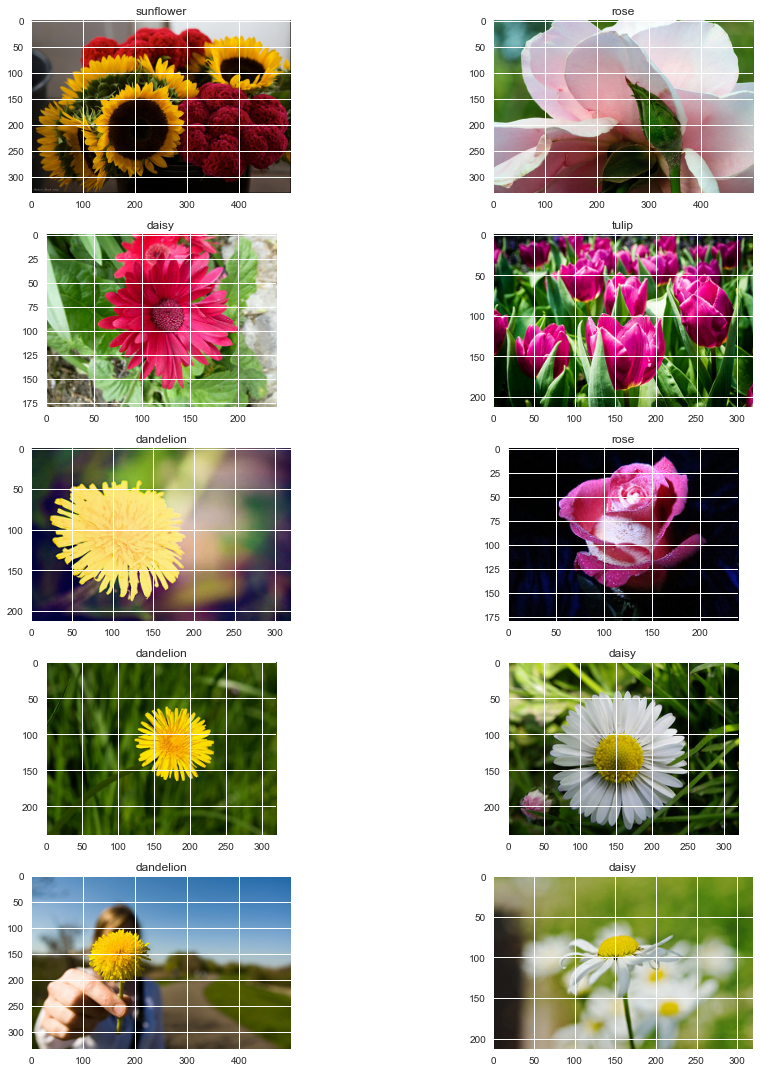

In [15]:
import random

fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range
        plt.style.use('seaborn') (2):
        l=random.randint(0,len(df[['Type']].values))
        ax[i,j].imshow(plt.imread(df.iloc[l,0]))
        ax[i,j].set_title(df.iloc[l,1])
        
plt.tight_layout()

# Features and target seperating + Label and Categorical Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
le = LabelEncoder()

In [17]:
X = df.iloc[:,0]
y = df.iloc[:,1]

## Transforming and converting target values to categorical values

In [18]:
y = le.fit_transform(y)
# y = to_categorical(y,5)

## Reading images data path to get image in array formats

In [19]:
flower_imgs = []
for i in X:
    img = cv2.imread(i)
    img = cv2.resize(img, (64,64))
    flower_imgs.append(img)

## Standardizing images array

In [20]:
flower_imgs = np.array(flower_imgs)

In [21]:
X = flower_imgs

In [22]:
np.unique(y)

array([0, 1, 2, 3, 4])

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, shuffle=True)

In [25]:
X_test.shape,X_train.shape

((1730, 64, 64, 3), (2593, 64, 64, 3))

In [26]:
# X_train = X_train.reshape(2593, 64*64*3)
X_train = X_train.astype('float32')/255

# X_test = X_test.reshape(1730, 64*64*3)
X_test = X_test.astype('float32')/255

# Model

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling, Dropout2D

In [28]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=0.98):
      print("\nReached at desired accuracy so cancelling training!")
      self.model.stop_training = True

In [29]:
model = Sequential([Conv2D(16,(3,3),activation="relu",input_shape=(64,64,3)),
                    MaxPooling2D((2,2)),
                    Conv2D(32,(3,3),activation="relu", padding='same'),
                    MaxPooling2D((2,2)),
                    Conv2D(64,(3,3),activation="relu", padding='same'),
                    MaxPooling2D((2,2)),
                    Conv2D(128,(2,2),activation="relu", padding='same'),
                    MaxPooling2D((2,2)),
                    Conv2D(256,(2,2),activation="relu", padding='same'),
                    MaxPooling2D((2,2)),
                    
                    Dropout(0.3),Flatten(),
                    Dense(512, activation='relu'),   
                    Dense(5, activation='softmax')])

## Model Summary

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 31, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         3

## Compile

In [31]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training

In [32]:
callback = myCallback()

In [33]:
history = model.fit(X_train,y_train, epochs = 500,callbacks=[callback], batch_size=512)

Epoch 1/500
6/6 [==============================] - 4s 552ms/step - loss: 1.6038 - accuracy: 0.2339
Epoch 2/500
6/6 [==============================] - 3s 533ms/step - loss: 1.5611 - accuracy: 0.2633
Epoch 3/500
6/6 [==============================] - 3s 531ms/step - loss: 1.4163 - accuracy: 0.4087
Epoch 4/500
6/6 [==============================] - 3s 529ms/step - loss: 1.3290 - accuracy: 0.3995
Epoch 5/500
6/6 [==============================] - 3s 531ms/step - loss: 1.2635 - accuracy: 0.4423
Epoch 6/500
6/6 [==============================] - 3s 531ms/step - loss: 1.2243 - accuracy: 0.4711
Epoch 7/500
6/6 [==============================] - 3s 530ms/step - loss: 1.1886 - accuracy: 0.4805
Epoch 8/500
6/6 [==============================] - 3s 530ms/step - loss: 1.2004 - accuracy: 0.4729
Epoch 9/500
6/6 [==============================] - 3s 528ms/step - loss: 1.2089 - accuracy: 0.4895
Epoch 10/500
6/6 [==============================] - 3s 526ms/step - loss: 1.1356 - accuracy: 0.5175
Epoch 11/

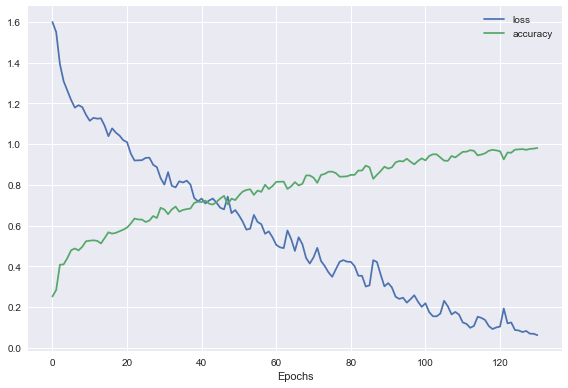

In [34]:
plt.style.use('seaborn')
pd.DataFrame(history.history).plot()
plt.xlabel("Epochs")
plt.tight_layout()

## Model Evaluation

55/55 [==============================] - 1s 9ms/step - loss: 1.2937 - accuracy: 0.7040


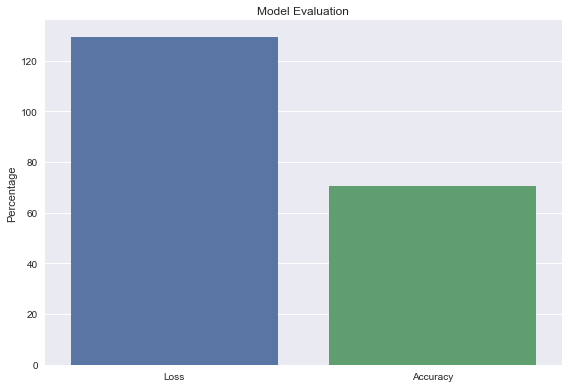

In [35]:
loss,acc = model.evaluate(X_test,y_test)
plt.style.use('seaborn')
sns.barplot(data=pd.DataFrame([{'Loss':loss,"Accuracy":acc}])*100)
plt.ylabel("Percentage")
plt.title("Model Evaluation")
plt.tight_layout()

# Prediction

In [36]:
y_pred = model.predict(X_test)

## Prediction Visualization with Test Data

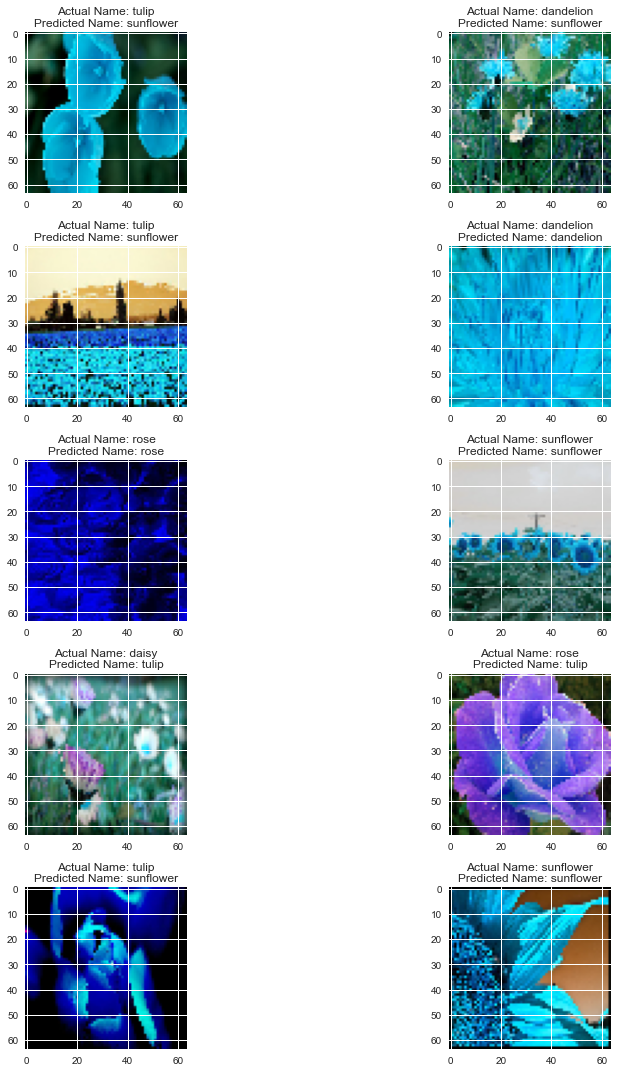

In [37]:
import random
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(X_test))
        ax[i,j].imshow(X_test[l])
        ax[i,j].set_title("Actual Name: " + "".join(le.inverse_transform([y_test[l]]))+
        "\nPredicted Name: " + "".join(le.inverse_transform(y_pred.argmax(1))[l]))
        
plt.tight_layout()

### Accuracy Score of True and Predicted Values

In [38]:
from sklearn.metrics import accuracy_score
print("Accuracy {:.3f}".format(accuracy_score(y_test,y_pred.argmax(1))*100))

Accuracy 70.405


In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
confusion_matrix(y_test,y_pred.argmax(1))

array([[214,  48,  21,  11,  25],
       [ 19, 317,  22,  43,  22],
       [ 12,  25, 202,   5,  76],
       [ 11,  20,   5, 221,  14],
       [ 12,  33,  69,  19, 264]], dtype=int64)

<AxesSubplot:>

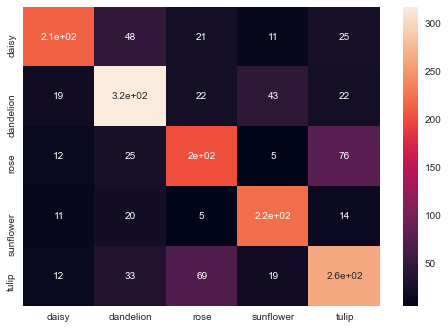

In [41]:
sns.heatmap(confusion_matrix(y_test,y_pred.argmax(1)), xticklabels=le.inverse_transform(np.unique(y_test)), yticklabels=le.inverse_transform(np.unique(y_test)), annot=True)

# <center> The End </center>